## 熔覆层稀释率计算—思路1: 熔覆区域确定-->滤波处理-->边缘检测-->(边缘加粗)-->(形态学处理)-->边缘连接(下一步)

### 模块导入

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
#%matplotlib notebook

### 读取图像并变换色域的函数

In [2]:
def read_pics(picture):
    #print(picture)
    img = cv.imread(picture, 1)
    #print(img.shape)
    img = cv.resize(img, None, fx=0.2, fy=0.2, interpolation = cv.INTER_AREA)
    #img = cv.cvtColor(img, cv.COLOR_BGR2YUV)
    return img

### 图片读入

['1-2.jpg', '1-3.jpg', '1-4.jpg', '2-3.jpg', '5-2.jpg', '5-3.jpg']


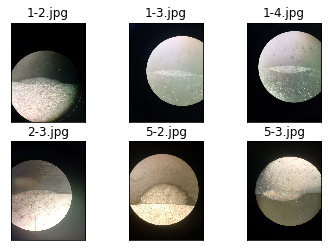

In [3]:
os.chdir(r'C:\Users\juedoujiang\Documents\Jupyter\Projects\★Dilution rate\Source')
pics = os.listdir()
print(pics)
pic_num = len(pics)
for i in range(pic_num):
    img = read_pics(pics[i])
    plt.subplot(2,3,i+1),plt.imshow(img[:, :, ::-1]) # img[:, :, ::-1]是将BGR转化为RGB, cmap='gray':图片以灰度的形式显示
    plt.title(pics[i]),plt.xticks([]),plt.yticks([])
#plt.savefig(r'C:\Users\juedoujiang\Documents\Jupyter\Project\★Dilution rate\Results\BGR.png', dpi = 1080)
plt.show()

### 熔覆区域确定

In [4]:
img = read_pics('1-4.jpg')
img_clip = img[345:425, 155:555]

### 滤波处理——高斯模糊(可以有效的从图像中去除高斯噪音)

In [5]:
blur = cv.GaussianBlur(img_clip, (5, 5), 0)

### 滤波处理——中值模糊(经常用来去除椒盐噪声)

In [6]:
blur = cv.medianBlur(img_clip, 3)

### 滤波处理——双边滤波(在保持边界清晰的情况下有效的去除噪声)

In [7]:
blur = cv.bilateralFilter(img_clip, 7, 75, 75)

### 滤波处理——中值模糊之后双边滤波

In [8]:
blur = cv.medianBlur(img_clip, 3)
blur = cv.bilateralFilter(blur, 7, 75, 75)

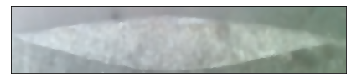

(<matplotlib.image.AxesImage at 0xf4e9748>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 None)

In [9]:
plt.imshow(blur),plt.xticks([]),plt.yticks([]),plt.show()

### 边缘检测——易受噪声干扰

In [10]:
edges = cv.Canny(blur, 70, 80)
print(edges[20,200])

0


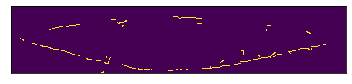

(<matplotlib.image.AxesImage at 0xf5fb608>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 None)

In [11]:
plt.imshow(edges),plt.xticks([]),plt.yticks([]),plt.show()

### #形态学处理（开运算去除噪点，闭运算填充小洞）

In [12]:
#kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2, 2)) #定义核
#kernel = np.ones((1,1), np.uint8)
#opening = cv.morphologyEx(edges, cv.MORPH_OPEN, kernel) #开运算

In [13]:
#plt.imshow(opening),plt.xticks([]),plt.yticks([]),plt.show()

### 填充处理

In [14]:
img_filled = edges.copy()
rows, cols = img_filled.shape
SIZE = 5  # 卷积核大小
P = int(SIZE / 2)
BLACK = 0
WHITE = 255
BEGIN = False
BP = []

for row in range(P, rows - P, 1):
    for col in range(P, cols - P, 1):
        if (img_filled[row, col] == WHITE).all():
            kernal = []
            for i in range(row - P, row + P + 1, 1):
                for j in range(col - P, col + P + 1, 1):
                    kernal.append(img_filled[i, j])
                    if (img_filled[i, j] == BLACK).all():
                        # print(i,j)
                        BP.append([i, j])

print(len(BP))
uniqueBP = np.array(list(set([tuple(c) for c in BP])))
print(len(uniqueBP))

for x, y in uniqueBP:
    img_filled[x, y] = 255

9452
2596


### 图像填充后形态学开运算

In [15]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3)) #定义核
opening = cv.morphologyEx(img_filled, cv.MORPH_OPEN, kernel) #开运算

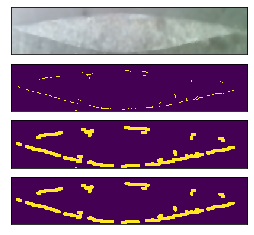

In [16]:
plt.subplot(411),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.subplot(412),plt.imshow(edges)
plt.xticks([]), plt.yticks([])
plt.subplot(413),plt.imshow(img_filled)
plt.xticks([]), plt.yticks([])
plt.subplot(414),plt.imshow(opening)
plt.xticks([]), plt.yticks([])
plt.show()